# Assignment on Model Selection

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [2]:
titanic = pd.read_csv(r"C:\Users\hp\Desktop\titanic_dataset (1).csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.shape

(891, 12)

In [3]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

.

Preprocessing

.

In [35]:
titanic1=titanic.drop(['Name','Fare','Cabin','Ticket','PassengerId'],axis=1)

In [36]:
titanic1['Family']=titanic1['SibSp']+titanic1['Parch']+1

In [37]:
titanic1=titanic1.drop(['SibSp','Parch'],axis=1)

In [38]:
titanic1.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Embarked      2
Family        0
dtype: int64

In [39]:
titanic1['Age']=titanic1['Age'].fillna(titanic1['Age'].median())

In [40]:
titanic1['Embarked']=titanic1['Embarked'].fillna(titanic1['Embarked'].mode())

In [41]:
titanic1=pd.get_dummies(titanic1)

In [43]:
titanic1.columns

Index(['Survived', 'Pclass', 'Age', 'Family', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [44]:
titanic1

,Survived,Pclass,Age,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,2,0,1,0,0,1
1,1,1,38.0,2,1,0,1,0,0
2,1,3,26.0,1,1,0,0,0,1
3,1,1,35.0,2,1,0,0,0,1
4,0,3,35.0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,1,0,1,0,0,1
887,1,1,19.0,1,1,0,0,0,1
888,0,3,28.0,4,1,0,0,0,1
889,1,1,26.0,1,0,1,1,0,0


In [45]:
scale=titanic1.drop(['Survived','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S'],axis=1)
noscale=titanic1.drop(['Pclass', 'Age', 'Family'],axis=1)

In [47]:
minmax=MinMaxScaler(feature_range=(0,1))
scale=minmax.fit_transform(scale)
type(scale)

numpy.ndarray

In [50]:
scale=pd.DataFrame(scale,columns=['Pclass', 'Age', 'Family'])

In [52]:
titanic2=pd.concat([scale,noscale],axis=1)

In [53]:
titanic2

,Pclass,Age,Family,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.271174,0.1,0,0,1,0,0,1
1,0.0,0.472229,0.1,1,1,0,1,0,0
2,1.0,0.321438,0.0,1,1,0,0,0,1
3,0.0,0.434531,0.1,1,1,0,0,0,1
4,1.0,0.434531,0.0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0.5,0.334004,0.0,0,0,1,0,0,1
887,0.0,0.233476,0.0,1,1,0,0,0,1
888,1.0,0.346569,0.3,0,1,0,0,0,1
889,0.0,0.321438,0.0,1,0,1,1,0,0


In [54]:
x=titanic2.drop('Survived',axis=1)
y=titanic2['Survived']

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

.

kNN

.

In [56]:
metric_k=[]
neighbors=np.arange(3,15)

In [57]:
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    model1=knn.fit(x_train,y_train)
    y_pred_knn=model1.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

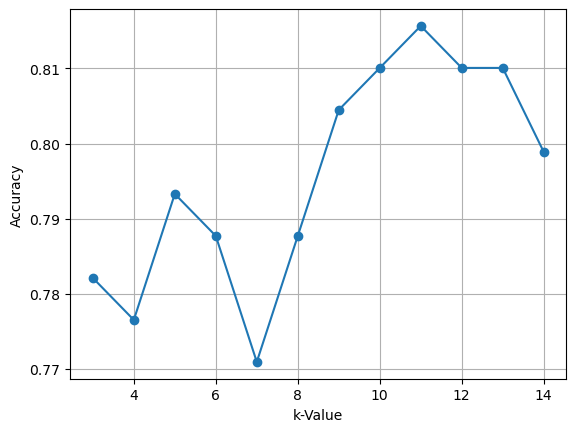

In [58]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k-Value')
plt.ylabel('Accuracy')
plt.grid()

In [59]:
knn1=KNeighborsClassifier(n_neighbors=11)
model2=knn1.fit(x_train,y_train)
y_pred_knn1=model2.predict(x_test)
print(accuracy_score(y_test,y_pred_knn1))

0.8156424581005587


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


.

SVM Linear

In [61]:
svm_clf_l=SVC(kernel='linear')
svm_model_l=svm_clf_l.fit(x_train,y_train)
y_pred_svm_l=svm_clf_l.predict(x_test)
print(accuracy_score(y_test,y_pred_svm_l))

0.7821229050279329


SVM RBF

In [62]:
svm_clf_r=SVC(kernel='rbf')
svm_model_r=svm_clf_r.fit(x_train,y_train)
y_pred_svm_r=svm_clf_r.predict(x_test)
print(accuracy_score(y_test,y_pred_svm_r))

0.7932960893854749


SVM Polynomial

In [63]:
svm_clf_p=SVC(kernel='poly',degree=2)
svm_model_p=svm_clf_p.fit(x_train,y_train)
y_pred_svm_p=svm_clf_p.predict(x_test)
print(accuracy_score(y_test,y_pred_svm_p))

0.7932960893854749


.

K-Fold Validation for kNN

.

In [65]:
kfold_validator=KFold(10)
for train_index,test_index in kfold_validator.split(x,y):
    print('Training Index:',train_index)
    print('Testing Index:',test_index)

Training Index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [70]:
cv_result=cross_val_score(model2,x,y,cv=kfold_validator)
np.mean(cv_result)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

0.7946566791510612

.

KFold Validation for SVM Linear

In [75]:
cv_result_svm_l=cross_val_score(svm_model_l,x,y,cv=kfold_validator)
np.mean(cv_result_svm_l)

0.786729088639201

.

KFold Validator for SVM RBF

In [76]:
cv_result_svm_r=cross_val_score(svm_model_r,x,y,cv=kfold_validator)
np.mean(cv_result_svm_r)

0.8114481897627964

.

KFold Validator for SVM Polynomial

In [77]:
cv_result_svm_p=cross_val_score(svm_model_p,x,y,cv=kfold_validator)
np.mean(cv_result_svm_p)

0.8058302122347065

In [80]:
print('Average Accurancy Scores (KFold cross validation):', '\n \t kNN:' ,(np.mean(cv_result))*100,'%','\n \t SVM Linear:',(np.mean(cv_result_svm_l))*100,'%', '\n \t SVM RBF:',(np.mean(cv_result_svm_r))*100,'%','\n \t SVM Polynomial:',(np.mean(cv_result_svm_p))*100,'%')

Average Accurancy Scores (KFold cross validation): 
 	 kNN: 79.46566791510612 % 
 	 SVM Linear: 78.6729088639201 % 
 	 SVM RBF: 81.14481897627964 % 
 	 SVM Polynomial: 80.58302122347065 %


.

Stratified K-Fold Cross Validation for kNN

In [72]:
skfold_validator=StratifiedKFold(n_splits=10)
for train_index,test_index in skfold_validator.split(x,y):
    print('Training Index:',train_index)
    print('Testing Index:',test_index)

Training Index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [74]:
skcv_result=cross_val_score(model2,x,y,cv=skfold_validator)
np.mean(skcv_result)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

0.7923970037453184

.

Stratified K-Fold Cross Validation for SVM Linear

In [81]:
skcv_result_l=cross_val_score(svm_model_l,x,y,cv=skfold_validator)
np.mean(skcv_result_l)

0.786729088639201

.

Stratified K-Fold Cross Validation for SVM RBF

In [82]:
skcv_result_r=cross_val_score(svm_model_r,x,y,cv=skfold_validator)
np.mean(skcv_result_r)

0.8114357053682897

.

Stratified K-Fold Cross Validation for SVM Polynomial

In [83]:
skcv_result_p=cross_val_score(svm_model_p,x,y,cv=skfold_validator)
np.mean(skcv_result_p)

0.8080649188514357

In [85]:
print('Average Accurancy Scores (Stratified KFold cross validation):', '\n \t kNN:' ,(np.mean(skcv_result))*100,'%','\n \t SVM Linear:',(np.mean(skcv_result_l))*100,'%', '\n \t SVM RBF:',(np.mean(skcv_result_r))*100,'%','\n \t SVM Polynomial:',(np.mean(skcv_result_p))*100,'%')

Average Accurancy Scores (Stratified KFold cross validation): 
 	 kNN: 79.23970037453184 % 
 	 SVM Linear: 78.6729088639201 % 
 	 SVM RBF: 81.14357053682897 % 
 	 SVM Polynomial: 80.80649188514357 %
